In [176]:
# Load packages

import numpy as np
import pandas as pd
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier


In [177]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

In [178]:
import yfinance as yf

ticker = 'ETH-USD'

dataset = yf.download(ticker, start='2015-01-01', end='2024-10-20', interval='1d')

print(dataset.head())

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                        ETH-USD     ETH-USD     ETH-USD     ETH-USD   
Date                                                                        
2017-11-09 00:00:00+00:00  320.884003  320.884003  329.451996  307.056000   
2017-11-10 00:00:00+00:00  299.252991  299.252991  324.717987  294.541992   
2017-11-11 00:00:00+00:00  314.681000  314.681000  319.453003  298.191986   
2017-11-12 00:00:00+00:00  307.907990  307.907990  319.153015  298.513000   
2017-11-13 00:00:00+00:00  316.716003  316.716003  328.415009  307.024994   

Price                            Open      Volume  
Ticker                        ETH-USD     ETH-USD  
Date                                               
2017-11-09 00:00:00+00:00  308.644989   893249984  
2017-11-10 00:00:00+00:00  320.670990   885985984  
2017-11-11 00:00:00+00:00  298.585999   842300992  
2017-11-12 00:00:00+00:00  314.690002  1613479936  
2017-11-13 00:00:00

In [179]:
dataset.reset_index(inplace=True)
dataset

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
0,2017-11-09 00:00:00+00:00,320.884003,320.884003,329.451996,307.056000,308.644989,893249984
1,2017-11-10 00:00:00+00:00,299.252991,299.252991,324.717987,294.541992,320.670990,885985984
2,2017-11-11 00:00:00+00:00,314.681000,314.681000,319.453003,298.191986,298.585999,842300992
3,2017-11-12 00:00:00+00:00,307.907990,307.907990,319.153015,298.513000,314.690002,1613479936
4,2017-11-13 00:00:00+00:00,316.716003,316.716003,328.415009,307.024994,307.024994,1041889984
...,...,...,...,...,...,...,...
2532,2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
2533,2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
2534,2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321


In [180]:
dataset.columns = ['_'.join(col).strip() for col in dataset.columns.values]


In [181]:
dataset.to_csv('eth_cleaned_data.csv', index=False)


In [182]:
dataset.shape

(2537, 7)

In [183]:
dataset.describe()

,Adj Close_ETH-USD,Close_ETH-USD,High_ETH-USD,Low_ETH-USD,Open_ETH-USD,Volume_ETH-USD
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2.537000e+03
mean,1440.860284,1440.860284,1479.441267,1396.793582,1440.119316,1.246581e+10
std,1203.947167,1203.947167,1236.033668,1168.217939,1204.226406,9.927912e+09
min,84.308296,84.308296,85.342743,82.829887,84.279694,6.217330e+08
25%,259.763977,259.763977,266.871246,246.858994,259.819855,5.396998e+09
50%,1295.688599,1295.688599,1335.662720,1262.271118,1294.917358,1.031782e+10
75%,2297.292969,2297.292969,2352.327881,2214.263184,2298.367188,1.696470e+10
max,4812.087402,4812.087402,4891.704590,4718.039062,4810.071289,8.448291e+10


In [184]:
print(dataset.isnull().sum())

Date_                0
Adj Close_ETH-USD    0
Close_ETH-USD        0
High_ETH-USD         0
Low_ETH-USD          0
Open_ETH-USD         0
Volume_ETH-USD       0
dtype: int64


In [185]:
dataset.columns = dataset.columns.str.replace('_', '', regex=False)
dataset.columns = dataset.columns.str.replace('-', '', regex=False)
dataset.columns = dataset.columns.str.replace('ETHUSD', '', regex=False)

In [186]:
dataset = dataset.dropna(axis=0)

In [187]:
# Make sure Date is the index before plotting
dataset.set_index('Date', inplace=True)

In [188]:
dataset

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-11-09 00:00:00+00:00,320.884003,320.884003,329.451996,307.056000,308.644989,893249984
2017-11-10 00:00:00+00:00,299.252991,299.252991,324.717987,294.541992,320.670990,885985984
2017-11-11 00:00:00+00:00,314.681000,314.681000,319.453003,298.191986,298.585999,842300992
2017-11-12 00:00:00+00:00,307.907990,307.907990,319.153015,298.513000,314.690002,1613479936
2017-11-13 00:00:00+00:00,316.716003,316.716003,328.415009,307.024994,307.024994,1041889984
...,...,...,...,...,...,...
2024-10-15 00:00:00+00:00,2606.021973,2606.021973,2685.166748,2537.940918,2629.017578,22003780898
2024-10-16 00:00:00+00:00,2611.102051,2611.102051,2644.854248,2589.606934,2606.019531,17012396419
2024-10-17 00:00:00+00:00,2604.273438,2604.273438,2646.874023,2577.305908,2611.192139,15150712321


In [189]:
dataset.drop(columns="Adj Close", inplace=True)

In [190]:
# Printing the start date and End date of the dataset

sd=dataset.index[0]
ed=dataset.index[-1]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2017-11-09 00:00:00+00:00
Ending Date 2024-10-19 00:00:00+00:00


In [191]:
# remove time from the data
dataset.index = pd.to_datetime(dataset.index).date

print(dataset.index)

Index([2017-11-09, 2017-11-10, 2017-11-11, 2017-11-12, 2017-11-13, 2017-11-14,
       2017-11-15, 2017-11-16, 2017-11-17, 2017-11-18,
       ...
       2024-10-10, 2024-10-11, 2024-10-12, 2024-10-13, 2024-10-14, 2024-10-15,
       2024-10-16, 2024-10-17, 2024-10-18, 2024-10-19],
      dtype='object', length=2537)


In [192]:
dataset.head()


,Close,High,Low,Open,Volume
2017-11-09,320.884003,329.451996,307.056000,308.644989,893249984
2017-11-10,299.252991,324.717987,294.541992,320.670990,885985984
2017-11-11,314.681000,319.453003,298.191986,298.585999,842300992
2017-11-12,307.907990,319.153015,298.513000,314.690002,1613479936
2017-11-13,316.716003,328.415009,307.024994,307.024994,1041889984


In [193]:
dataset.info

<bound method DataFrame.info of                   Close         High          Low         Open       Volume
2017-11-09   320.884003   329.451996   307.056000   308.644989    893249984
2017-11-10   299.252991   324.717987   294.541992   320.670990    885985984
2017-11-11   314.681000   319.453003   298.191986   298.585999    842300992
2017-11-12   307.907990   319.153015   298.513000   314.690002   1613479936
2017-11-13   316.716003   328.415009   307.024994   307.024994   1041889984
...                 ...          ...          ...          ...          ...
2024-10-15  2606.021973  2685.166748  2537.940918  2629.017578  22003780898
2024-10-16  2611.102051  2644.854248  2589.606934  2606.019531  17012396419
2024-10-17  2604.273438  2646.874023  2577.305908  2611.192139  15150712321
2024-10-18  2641.552246  2674.371826  2595.958984  2604.814453  17043738652
2024-10-19  2648.656982  2661.872803  2631.656982  2641.488281   8557834553

[2537 rows x 5 columns]>

In [194]:
dataset.describe

<bound method NDFrame.describe of                   Close         High          Low         Open       Volume
2017-11-09   320.884003   329.451996   307.056000   308.644989    893249984
2017-11-10   299.252991   324.717987   294.541992   320.670990    885985984
2017-11-11   314.681000   319.453003   298.191986   298.585999    842300992
2017-11-12   307.907990   319.153015   298.513000   314.690002   1613479936
2017-11-13   316.716003   328.415009   307.024994   307.024994   1041889984
...                 ...          ...          ...          ...          ...
2024-10-15  2606.021973  2685.166748  2537.940918  2629.017578  22003780898
2024-10-16  2611.102051  2644.854248  2589.606934  2606.019531  17012396419
2024-10-17  2604.273438  2646.874023  2577.305908  2611.192139  15150712321
2024-10-18  2641.552246  2674.371826  2595.958984  2604.814453  17043738652
2024-10-19  2648.656982  2661.872803  2631.656982  2641.488281   8557834553

[2537 rows x 5 columns]>

# **Preprocessing the data** 

# Adding the indicators

In [195]:
# making the exponential moving average
def EMA(df,n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30']= EMA(dataset, 30)
dataset['EMA200'] = EMA (dataset, 200)
dataset.tail()

,Close,High,Low,Open,Volume,EMA10,EMA30,EMA200
2024-10-15,2606.021973,2685.166748,2537.940918,2629.017578,22003780898,2501.555549,2494.187525,2806.440441
2024-10-16,2611.102051,2644.854248,2589.606934,2606.019531,17012396419,2521.473095,2501.730397,2804.496776
2024-10-17,2604.273438,2646.874023,2577.305908,2611.192139,15150712321,2536.527703,2508.346077,2802.504503
2024-10-18,2641.552246,2674.371826,2595.958984,2604.814453,17043738652,2555.623074,2516.940024,2800.902988
2024-10-19,2648.656982,2661.872803,2631.656982,2641.488281,8557834553,2572.538330,2525.437892,2799.388103


In [196]:
# Compact calculation of Rate of Change
dataset['ROC10'] = dataset['Close'].pct_change(10) * 100
dataset['ROC30'] = dataset['Close'].pct_change(30) * 100

In [197]:
# Compute the momentum

dataset['MOM10'] = dataset['Close'].diff(10)
dataset['MOM30'] = dataset['Close'].diff(30)

In [198]:
# compute the Relative strength index
import talib

dataset['RSI10'] = talib.RSI(dataset['Close'], timeperiod=10)
dataset['RSI30'] = talib.RSI(dataset['Close'], timeperiod=30)
dataset['RSI200'] = talib.RSI(dataset['Close'], timeperiod=200)

In [199]:
#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [200]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)

In [201]:
dataset.dropna(inplace=True)

print(dataset.isnull().sum())

Close     0
High      0
Low       0
Open      0
Volume    0
EMA10     0
EMA30     0
EMA200    0
ROC10     0
ROC30     0
MOM10     0
MOM30     0
RSI10     0
RSI30     0
RSI200    0
%K10      0
%D10      0
%K30      0
%D30      0
%K200     0
%D200     0
MA21      0
MA63      0
MA252     0
dtype: int64


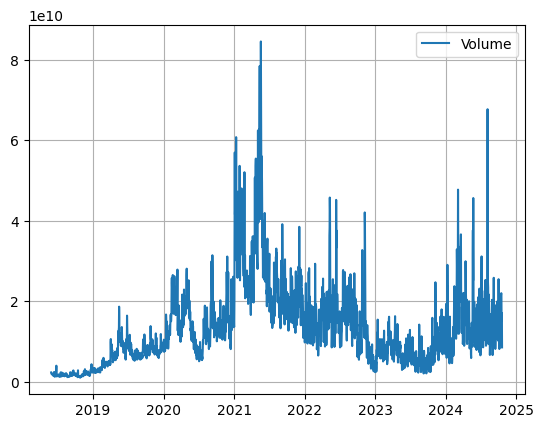

In [202]:
dataset[['Volume']].plot(grid=True)
plt.show()

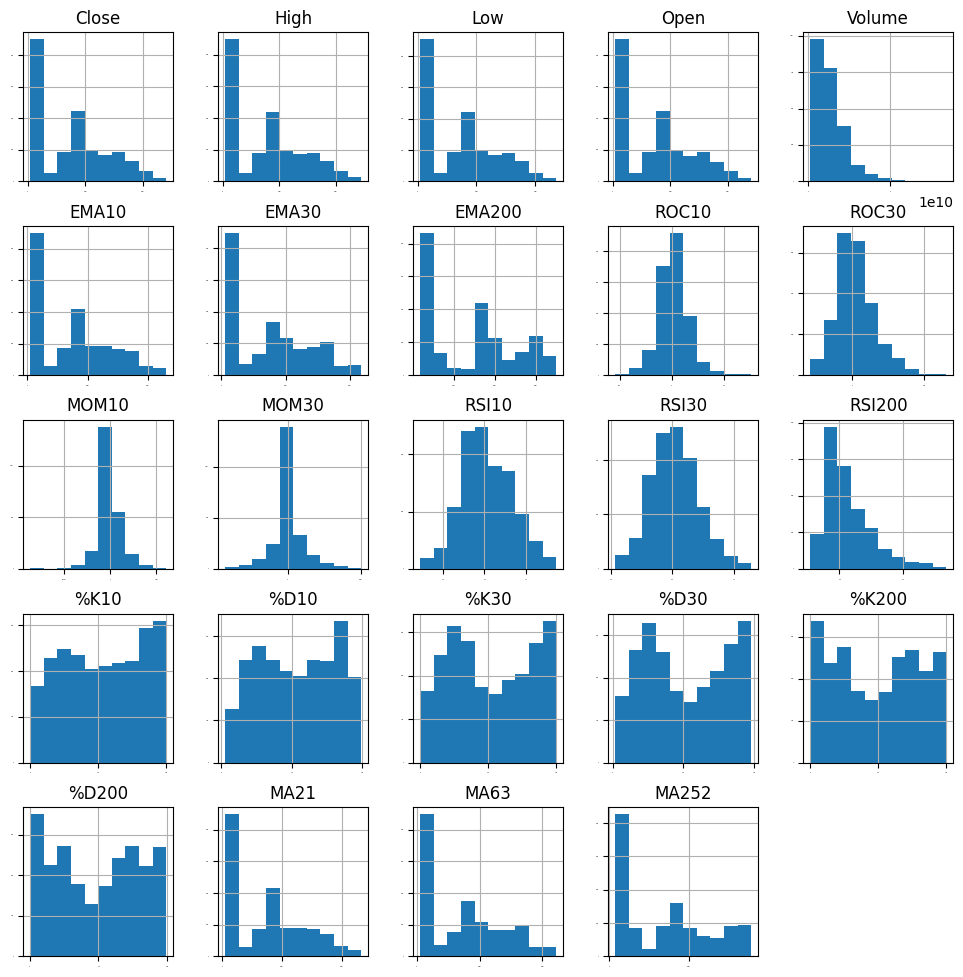

In [203]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

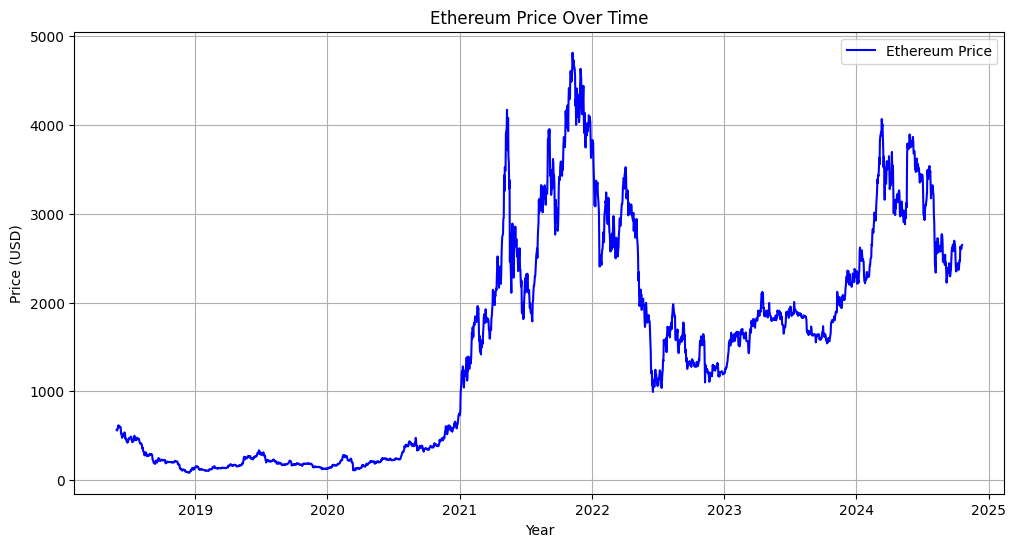

In [204]:
eth_prices = dataset[['Close']]

import matplotlib.pyplot as plt

# Plot the Ethereum price
plt.figure(figsize=(12, 6))
plt.plot(eth_prices, label='Ethereum Price', color='blue')
plt.title('Ethereum Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


# Models and algorithms

# LSTM model

In [205]:
dataset['signal'] = (dataset['Close'].shift(-1) > dataset['Close']).astype(int)

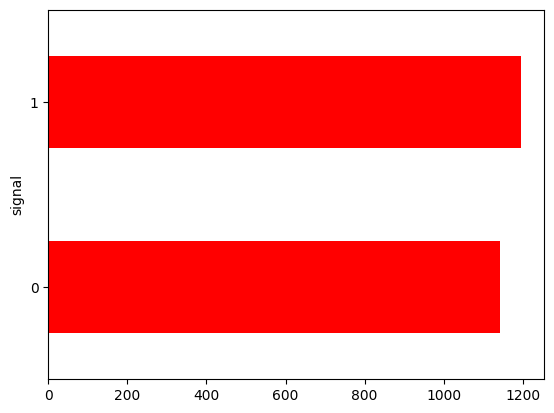

In [206]:
fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

## Scale and train

In [207]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))


In [208]:
columns_to_scale = [
    'Open', 'High', 'Low', 'Close', 'Volume',   # Price features
    'EMA10', 'EMA30', 'EMA200',                # Key EMAs
    'ROC10', 'MOM10',                          # Momentum indicators
    'RSI10',                                   # Short-term RSI
    '%K10', '%D10'                             # Stochastic Oscillators (short-term)
]

features_to_scale = dataset[columns_to_scale]


In [209]:
scaled_features = scaler.fit_transform(features_to_scale)

scaled_data = pd.DataFrame(scaled_features, columns=columns_to_scale)

scaled_data['signal'] = dataset['signal'].values


In [210]:
print(scaled_data.tail())

print(scaled_data.describe())


          Open      High       Low     Close    Volume     EMA10     EMA30  \
2331  0.538479  0.540913  0.529666  0.533382  0.250833  0.532133  0.562051   
2332  0.533612  0.532526  0.540812  0.534457  0.190983  0.536529  0.563831   
2333  0.534707  0.532946  0.538158  0.533012  0.168660  0.539851  0.565392   
2334  0.533357  0.538667  0.542182  0.540898  0.191358  0.544066  0.567419   
2335  0.541118  0.536067  0.549884  0.542400  0.089607  0.547799  0.569425   

        EMA200     ROC10     MOM10     RSI10      %K10      %D10  signal  
2331  0.789130  0.475326  0.651315  0.631025  0.777297  0.808844       1  
2332  0.788547  0.468726  0.644815  0.636094  0.791591  0.832353       0  
2333  0.787950  0.472687  0.648642  0.623316  0.772377  0.779483       1  
2334  0.787470  0.478262  0.655138  0.665067  0.877274  0.813941       1  
2335  0.787017  0.505438  0.681705  0.672950  0.897266  0.850363       0  
              Open         High          Low        Close       Volume  \
count  

## Sequence length

In [211]:
sequence_length = 30

In [ ]:
import numpy as np

X = []
y = []

for i in range(sequence_length, len(scaled_data)):

    X.append(scaled_data.iloc[i-sequence_length:i, :-1].values)

    y.append(scaled_data.iloc[i, -1])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2306, 30, 13)
y shape: (2306,)


In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (1844, 30, 13) (1844,)
Testing data shape: (462, 30, 13) (462,)


In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


## Model

In [ ]:
# Initialize the model
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
#model.add(Dropout(0.2))

# Dense output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))


In [216]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 50)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,051 (129.11 KB)

 Trainable params: 33,051 (129.11 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5174 - loss: 0.6931 - val_accuracy: 0.5195 - val_loss: 0.6924
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5148 - loss: 0.6927 - val_accuracy: 0.5195 - val_loss: 0.6922
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4992 - loss: 0.6945 - val_accuracy: 0.5195 - val_loss: 0.6922
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4961 - loss: 0.6941 - val_accuracy: 0.5195 - val_loss: 0.6922
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5357 - loss: 0.6910 - val_accuracy: 0.5195 - val_loss: 0.6922
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5100 - loss: 0.6933 - val_accuracy: 0.5281 - val_loss: 0.6923
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5121 - loss: 0.6928 - val_accuracy: 0.5346 - val_loss: 0.6923
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5028 - loss: 0.6928 - val_accuracy: 0.5325 - v

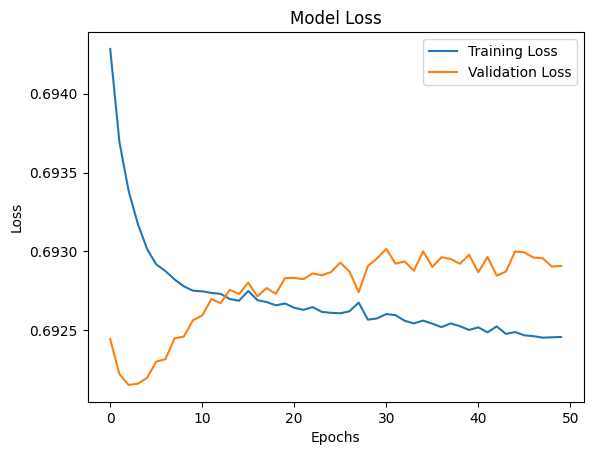

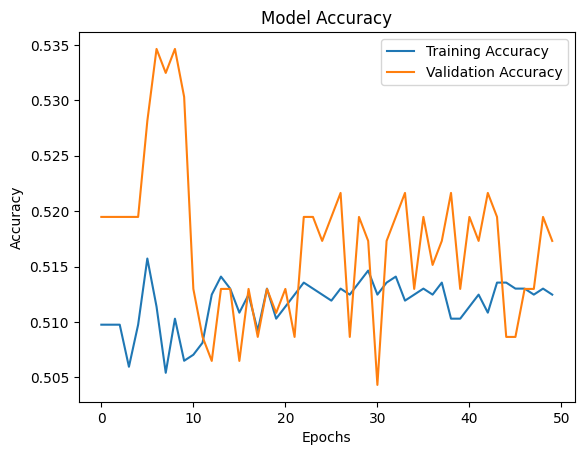

In [218]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Comparing the predicted results with real ones

In [219]:
# Predict probabilities for the test data
predicted_probs = model.predict(X_test)

# Convert probabilities to binary signals (1 = Buy, 0 = Don't Buy)
predicted_signals = (predicted_probs > 0.5).astype(int).flatten()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [220]:
# Extract the relevant dates and prices for the test set
test_dates = dataset.iloc[-len(y_test):].index
test_prices = dataset.iloc[-len(y_test):]['Close']

# Create a DataFrame to store predictions, actual signals, and prices
results = pd.DataFrame({
    'Date': test_dates,
    'Price': test_prices,
    'Predicted Signal': predicted_signals,
    'Actual Signal': y_test  # Optional: Include actual signals for comparison
})


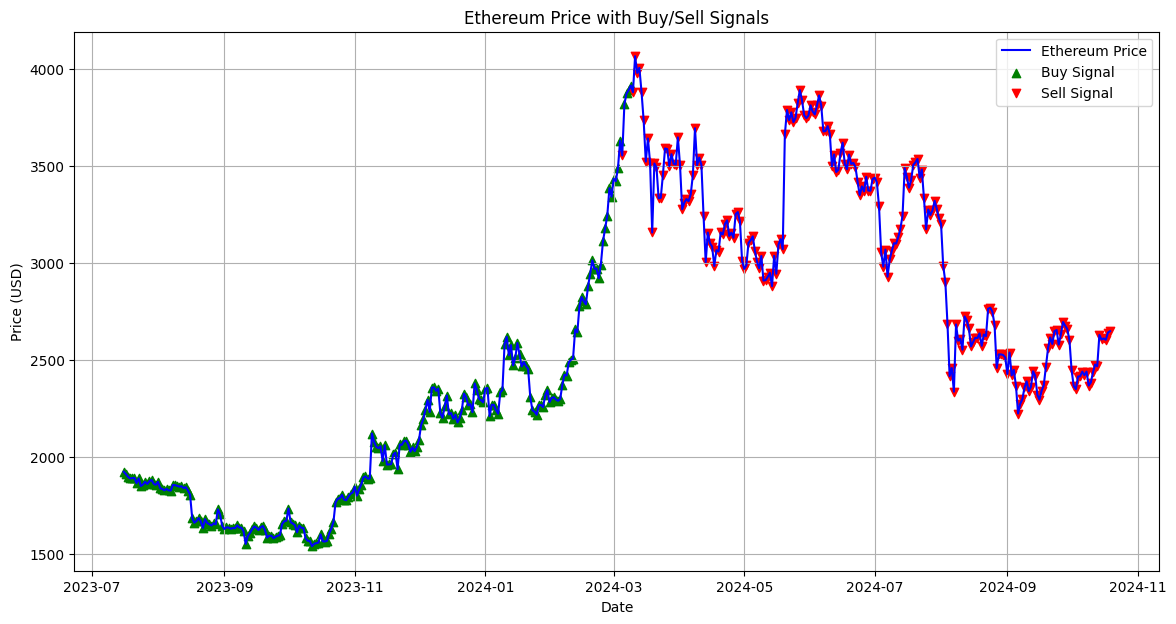

In [221]:
plt.figure(figsize=(14, 7))

# Plot Ethereum price
plt.plot(results['Date'], results['Price'], label='Ethereum Price', color='blue')

# Plot buy signals (green dots)
buy_signals = results[results['Predicted Signal'] == 1]
plt.scatter(buy_signals['Date'], buy_signals['Price'], color='green', label='Buy Signal', marker='^', alpha=1)

# Plot sell signals (red dots) if needed
sell_signals = results[results['Predicted Signal'] == 0]
plt.scatter(sell_signals['Date'], sell_signals['Price'], color='red', label='Sell Signal', marker='v', alpha=1)

plt.title('Ethereum Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


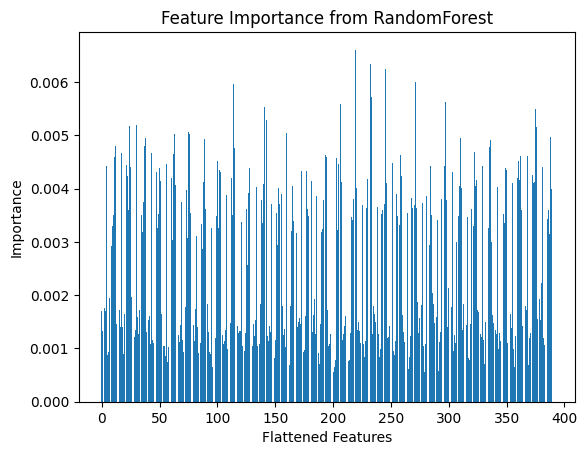

In [222]:
# Flatten 3D LSTM input (samples, timesteps, features) to 2D (samples, timesteps * features)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Initialize RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_flattened, y_train)

# Get feature importances
importances = rf.feature_importances_

# Visualize feature importance
import matplotlib.pyplot as plt
plt.bar(range(len(importances)), importances)
plt.xlabel('Flattened Features')
plt.ylabel('Importance')
plt.title('Feature Importance from RandomForest')
plt.show()

In [223]:
# Get the names of the original features
original_features = ['Close', 'Volume', 'EMA10', 'EMA30', 'RSI10']  # Update with your actual features
sequence_length = 30  # Your LSTM sequence length

# Create a mapping
flattened_feature_names = [
    f"{feature}_t-{sequence_length - t}"  # Feature at time step t
    for t in range(sequence_length)  # Loop over timesteps
    for feature in original_features  # Loop over features
]

# Confirm mapping length matches flattened features
print(len(flattened_feature_names))  # Should match X_train_flattened.shape[1]

150


In [224]:
sequence_length = X_train.shape[1]  # This is the number of timesteps in your LSTM

# Generate feature names for flattened features
flattened_feature_names = [
    f"{feature}_t-{sequence_length - t}"  # Feature name with timestep suffix
    for t in range(sequence_length)  # Loop over timesteps
    for feature in columns_to_scale  # Use the updated feature list
]

# Confirm the number of generated names matches your flattened data
print(f"Flattened feature names: {len(flattened_feature_names)}")
print(f"Flattened data features: {X_train_flattened.shape[1]}")


Flattened feature names: 390
Flattened data features: 390


In [225]:
print(f"X_train_flattened shape: {X_train_flattened.shape}")
print(f"Feature importances length: {len(importances)}")
print(f"Flattened feature names length: {len(flattened_feature_names)}")

X_train_flattened shape: (1844, 390)
Feature importances length: 390
Flattened feature names length: 390


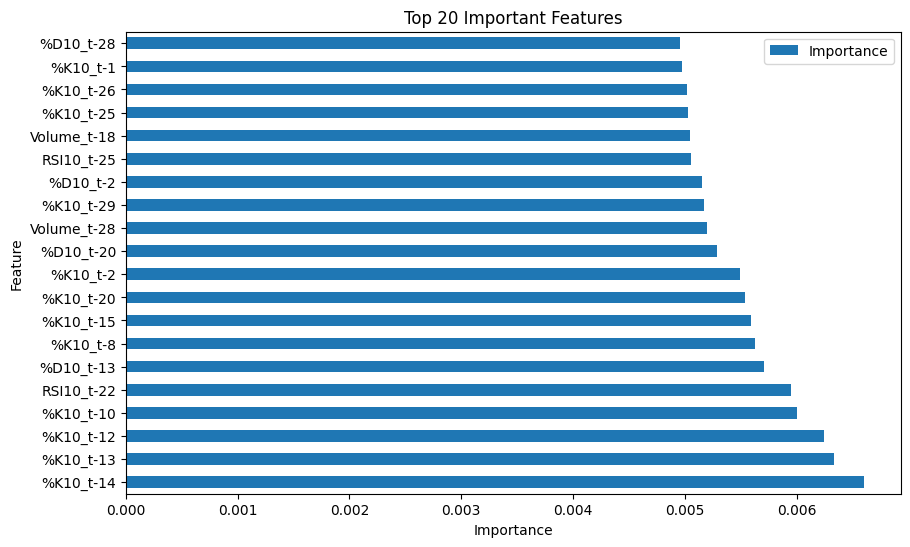

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': flattened_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 features
feature_importance_df.head(20).plot.barh(x='Feature', y='Importance', figsize=(10, 6))
plt.title("Top 20 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

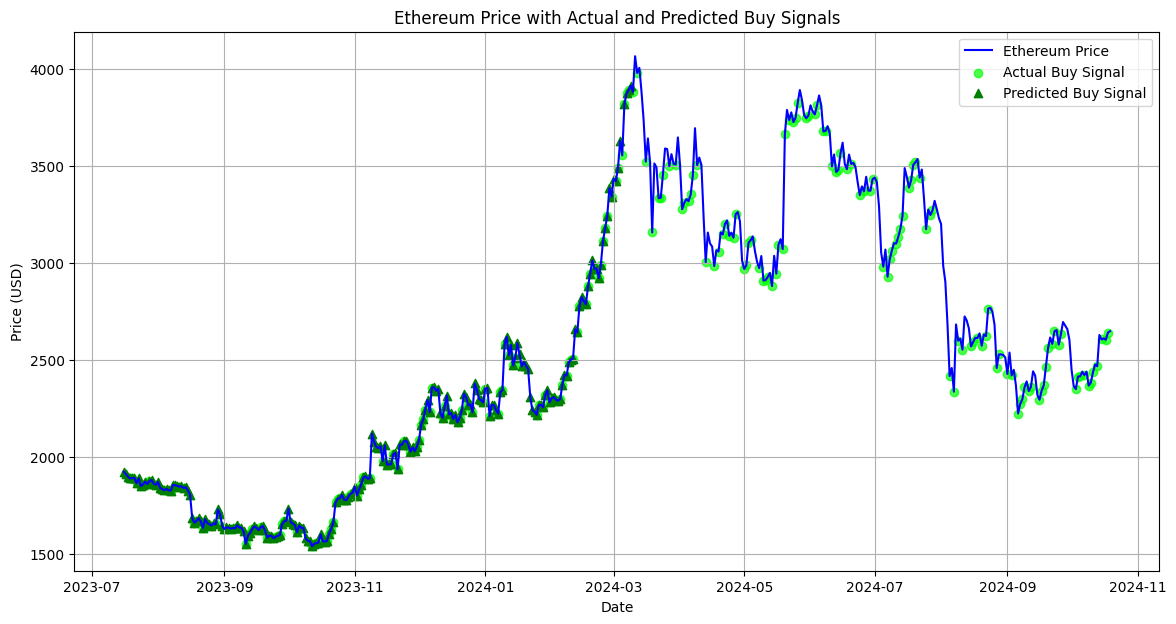

In [227]:
plt.figure(figsize=(14, 7))

# Plot Ethereum price
plt.plot(results['Date'], results['Price'], label='Ethereum Price', color='blue')

# Actual buy signals (green dots)
actual_buy_signals = results[results['Actual Signal'] == 1]
plt.scatter(actual_buy_signals['Date'], actual_buy_signals['Price'], color='lime', label='Actual Buy Signal', marker='o', alpha=0.7)

# Predicted buy signals (green triangles)
predicted_buy_signals = results[results['Predicted Signal'] == 1]
plt.scatter(predicted_buy_signals['Date'], predicted_buy_signals['Price'], color='green', label='Predicted Buy Signal', marker='^', alpha=1)

plt.title('Ethereum Price with Actual and Predicted Buy Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [228]:
dataset.value_counts('signal')

signal
1    1194
0    1142
Name: count, dtype: int64